In [ ]:
from google.colab import drive
import tarfile
import os, cv2
import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle
from keras.utils import np_utils
drive.mount('/content/drive'),

Mounted at /content/drive


(None,)

In [ ]:
data_path = '/content/drive/MyDrive/facial_expression/jaffe'
data_dir_list = os.listdir(data_path)

img_si=64
num_channel=1
img_data_list=[]

for dataset in data_dir_list:
    img_list=os.listdir(data_path+'/'+ dataset)
    print ('Loaded the images of dataset-'+'{}\n'.format(dataset))
    for img in img_list:
        input_img=cv2.imread(data_path + '/'+ dataset + '/'+ img )
        #input_img=cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
        input_img_resize=cv2.resize(input_img,(img_si,img_si))
        img_data_list.append(input_img_resize)
        
img_data = np.array(img_data_list)
img_data = img_data.astype('float32')
img_data = img_data/255
img_data.shape

Loaded the images of dataset-ANGRY

Loaded the images of dataset-DISGUST

Loaded the images of dataset-FEAR

Loaded the images of dataset-NEUTRAL

Loaded the images of dataset-HAPPY

Loaded the images of dataset-SAD

Loaded the images of dataset-SURPRISE



(213, 64, 64, 3)

In [ ]:
num_classes = 7

num_of_samples = img_data.shape[0]
labels = np.ones((num_of_samples,),dtype='int64')

labels[0:29]=0 #30
labels[30:58]=1 #29
labels[59:90]=2 #32
labels[91:121]=3 #31
labels[122:151]=4 #30
labels[152:182]=5 #31
labels[183:]=6 #30

names = ['ANGRY','DISGUST','FEAR','HAPPY','NEUTRAL','SAD','SURPRISE']

def getLabel(id):
    return ['ANGRY','DISGUST','FEAR','HAPPY','NEUTRAL','SAD','SURPRISE'][id]

In [ ]:
Y = np_utils.to_categorical(labels, num_classes)
#Shuffle the dataset
x,y = shuffle(img_data,Y, random_state=2)
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)
x_test=X_test
#X_train=X_train.reshape(X_train.shape[0],128,128,1)
#X_test=X_test.reshape(X_test.shape[0],128,128,1)
x_test.shape

(43, 64, 64, 3)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense , Activation , Dropout ,Flatten, BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D, AveragePooling2D
from keras.metrics import categorical_accuracy
from keras.models import model_from_json
from keras.callbacks import ModelCheckpoint
from keras.optimizers import *
from keras.layers.normalization import BatchNormalization
from tensorflow.keras.layers import Input, Concatenate
from tensorflow.keras import regularizers

In [ ]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, ZeroPadding2D
from tensorflow.keras.layers import Concatenate
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam, SGD

In [ ]:
input_shape=(img_si,img_si,3)

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape, padding='same', activation = 'relu'))
model.add(Conv2D(32, (3, 3), input_shape=input_shape, padding='same', activation = 'relu'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding='same', activation = 'relu'))
model.add(Conv2D(64, (3, 3), padding='same', activation = 'relu'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation = 'softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=["accuracy"])

In [ ]:
from keras import callbacks
filename1='modelNorm_train_new.csv'
filename4='modelCentering_train_new.csv'
filename16='modelWhitening_train_new.csv'
filename64='modelNone_train_new.csv'

filepath1 = os.path.join('checkpoint', filename1)
filepath4 = os.path.join('checkpoint', filename4)
filepath16 = os.path.join('checkpoint', filename16)
filepath64 = os.path.join('checkpoint', filename64)

checkpoint1 = callbacks.ModelCheckpoint(filepath1, monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='max')
checkpoint4 = callbacks.ModelCheckpoint(filepath4, monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='max')
checkpoint16 = callbacks.ModelCheckpoint(filepath16, monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='max')
checkpoint64 = callbacks.ModelCheckpoint(filepath64, monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='max')

In [ ]:
from sklearn.decomposition import PCA

dataNorm = tf.keras.preprocessing.image.ImageDataGenerator(
    featurewise_std_normalization=True,
    validation_split=0.2)

dataCentering = tf.keras.preprocessing.image.ImageDataGenerator(
    samplewise_center=True,
    validation_split=0.2)

dataWhitening = tf.keras.preprocessing.image.ImageDataGenerator(
    zca_whitening=True,
    validation_split=0.2)

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:349: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:337: UserWarning: This ImageDataGenerator specifies `zca_whitening`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


In [ ]:
dataNorm.fit(X_train)
hist1 = model.fit(dataNorm.flow(X_train, y_train, batch_size=7, subset='training'),
                  validation_data=dataNorm.flow(X_train, y_train, batch_size=7, subset='validation'), epochs=60, callbacks=checkpoint1)

Epoch 1/60
20/20 [==============================] - 5s 223ms/step - loss: 2.0408 - accuracy: 0.1691 - val_loss: 1.9391 - val_accuracy: 0.1765

Epoch 00001: val_accuracy improved from -inf to 0.17647, saving model to checkpoint/modelNorm_train_new.csv
INFO:tensorflow:Assets written to: checkpoint/modelNorm_train_new.csv/assets
Epoch 2/60
20/20 [==============================] - 4s 214ms/step - loss: 1.9312 - accuracy: 0.1765 - val_loss: 1.9342 - val_accuracy: 0.1765

Epoch 00002: val_accuracy did not improve from 0.17647
Epoch 3/60
20/20 [==============================] - 4s 213ms/step - loss: 1.8963 - accuracy: 0.2574 - val_loss: 1.9549 - val_accuracy: 0.2059

Epoch 00003: val_accuracy improved from 0.17647 to 0.20588, saving model to checkpoint/modelNorm_train_new.csv
INFO:tensorflow:Assets written to: checkpoint/modelNorm_train_new.csv/assets
Epoch 4/60
20/20 [==============================] - 4s 214ms/step - loss: 1.8106 - accuracy: 0.2941 - val_loss: 1.8704 - val_accuracy: 0.2059



In [ ]:
dataCentering.fit(X_train)
hist2 = model.fit(dataCentering.flow(X_train, y_train, batch_size=7, subset='training'),
                  validation_data=dataCentering.flow(X_train, y_train, batch_size=7, subset='validation'), epochs=60, callbacks=checkpoint4)

Epoch 1/60
20/20 [==============================] - 4s 223ms/step - loss: 0.2097 - accuracy: 0.9706 - val_loss: 0.3441 - val_accuracy: 0.8824

Epoch 00001: val_accuracy improved from -inf to 0.88235, saving model to checkpoint/modelCentering_train_new.csv
INFO:tensorflow:Assets written to: checkpoint/modelCentering_train_new.csv/assets
Epoch 2/60
20/20 [==============================] - 4s 221ms/step - loss: 0.0865 - accuracy: 0.9853 - val_loss: 0.2733 - val_accuracy: 0.8824

Epoch 00002: val_accuracy did not improve from 0.88235
Epoch 3/60
20/20 [==============================] - 4s 221ms/step - loss: 0.0570 - accuracy: 0.9853 - val_loss: 0.2289 - val_accuracy: 0.9706

Epoch 00003: val_accuracy improved from 0.88235 to 0.97059, saving model to checkpoint/modelCentering_train_new.csv
INFO:tensorflow:Assets written to: checkpoint/modelCentering_train_new.csv/assets
Epoch 4/60
20/20 [==============================] - 4s 220ms/step - loss: 0.0593 - accuracy: 0.9853 - val_loss: 0.2165 - va

In [ ]:
dataWhitening.fit(X_train)
hist3 = model.fit(dataWhitening.flow(X_train, y_train, batch_size=7, subset='training'),
                  validation_data=dataWhitening.flow(X_train, y_train, batch_size=7, subset='validation'), epochs=60, callbacks=checkpoint16)

Epoch 1/60
20/20 [==============================] - 16s 770ms/step - loss: 1.0284 - accuracy: 0.7059 - val_loss: 1.1343 - val_accuracy: 0.5882

Epoch 00001: val_accuracy improved from -inf to 0.58824, saving model to checkpoint/modelWhitening_train_new.csv
INFO:tensorflow:Assets written to: checkpoint/modelWhitening_train_new.csv/assets
Epoch 2/60
20/20 [==============================] - 13s 663ms/step - loss: 0.2291 - accuracy: 0.9191 - val_loss: 1.9398 - val_accuracy: 0.4412

Epoch 00002: val_accuracy did not improve from 0.58824
Epoch 3/60
20/20 [==============================] - 14s 663ms/step - loss: 0.1948 - accuracy: 0.9412 - val_loss: 1.3502 - val_accuracy: 0.6176

Epoch 00003: val_accuracy improved from 0.58824 to 0.61765, saving model to checkpoint/modelWhitening_train_new.csv
INFO:tensorflow:Assets written to: checkpoint/modelWhitening_train_new.csv/assets
Epoch 4/60
20/20 [==============================] - 13s 662ms/step - loss: 0.1341 - accuracy: 0.9706 - val_loss: 1.4907 

In [ ]:
hist5 = model.fit(X_train, y_train, batch_size=7, epochs=60, verbose=1, validation_data=(X_test, y_test), callbacks=checkpoint64)

Epoch 1/60
25/25 [==============================] - 6s 222ms/step - loss: 1.1057 - accuracy: 0.6412 - val_loss: 0.9742 - val_accuracy: 0.6744

Epoch 00001: val_accuracy improved from -inf to 0.67442, saving model to checkpoint/modelNone_train_new.csv
INFO:tensorflow:Assets written to: checkpoint/modelNone_train_new.csv/assets
Epoch 2/60
25/25 [==============================] - 5s 213ms/step - loss: 0.3054 - accuracy: 0.8941 - val_loss: 0.6990 - val_accuracy: 0.7907

Epoch 00002: val_accuracy improved from 0.67442 to 0.79070, saving model to checkpoint/modelNone_train_new.csv
INFO:tensorflow:Assets written to: checkpoint/modelNone_train_new.csv/assets
Epoch 3/60
25/25 [==============================] - 5s 215ms/step - loss: 0.1577 - accuracy: 0.9294 - val_loss: 0.7841 - val_accuracy: 0.7442

Epoch 00003: val_accuracy did not improve from 0.79070
Epoch 4/60
25/25 [==============================] - 5s 211ms/step - loss: 0.3132 - accuracy: 0.8824 - val_loss: 0.7048 - val_accuracy: 0.7674



<Figure size 432x288 with 0 Axes>

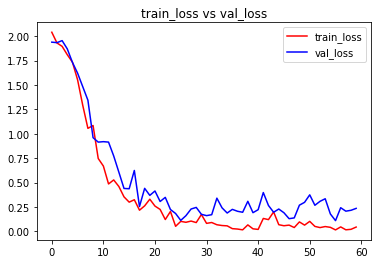

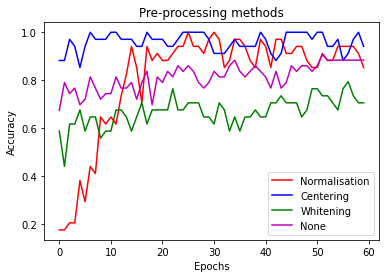

<Figure size 432x288 with 0 Axes>

In [16]:
train_loss=hist1.history['loss']
val_loss=hist1.history['val_loss']
train_acc=hist1.history['accuracy']

val_acc=hist1.history['val_accuracy']
bval_acc=hist2.history['val_accuracy']
cval_acc=hist3.history['val_accuracy']
eval_acc=hist5.history['val_accuracy']

epochs = range(len(train_acc))

pyplot.plot(epochs,train_loss,'r', label='train_loss')
pyplot.plot(epochs,val_loss,'b', label='val_loss')
pyplot.title('train_loss vs val_loss')
pyplot.legend()
pyplot.figure()

pyplot.plot(epochs,val_acc,'r', label='Normalisation')
pyplot.plot(epochs,bval_acc,'b', label='Centering')
pyplot.plot(epochs,cval_acc,'g', label='Whitening')
pyplot.plot(epochs,eval_acc,'m', label='None')
pyplot.title('Pre-processing methods')
pyplot.ylabel('Accuracy')
pyplot.xlabel('Epochs')
pyplot.legend()
pyplot.figure()